<a href="https://colab.research.google.com/github/szhang06/Digital-Philology/blob/main/Copy_of_Exam21_Q5_resolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd


In [2]:
import spacy

In [11]:
def read_and_sort():

  with open("/content/drive/MyDrive/dp_literary_analysis/female_five.txt", "r") as f:
    text_str = f.read()

  with open("/content/drive/MyDrive/dp_literary_analysis/english.txt", "r") as f:
    stop_ls = [x.strip() for x in f.readlines()]

  nlp = spacy.load("en_core_web_sm")
  nlp.max_length = 5000000

  processed = nlp(text_str)
  token_freq = {}
  for token in processed:
    if token.text.lower() in stop_ls:
      token_freq[token.text.lower()] = token_freq.get(token.text.lower(), 0) + 1
  
  # # remove stopwords  
  # for stopw in stop_ls:
  #   if stopw in token_freq:
  #     token_freq.pop(stopw)
  total_freq = sum(token_freq.values())
  token_freq_prob = [(key, value, value/total_freq) for key, value in token_freq.items()]
  
  # save to cvs
  df = pd.DataFrame(token_freq_prob, columns = ["token", "freq", "prob"])
  df.sort_values(by = "prob", ascending=False, inplace=True)
  df.to_csv("female.txt.probs", sep = "\t", index = False)

read_and_sort()

In [10]:
def read_and_sort():

  with open("/content/drive/MyDrive/dp_literary_analysis/male_five.txt", "r") as f:
    text_str = f.read()

  with open("/content/drive/MyDrive/dp_literary_analysis/english.txt", "r") as f:
    stop_ls = [x.strip() for x in f.readlines()]

  nlp = spacy.load("en_core_web_sm")
  nlp.max_length = 5000000

  processed = nlp(text_str)
  token_freq = {}
  for token in processed:
    if token.text.lower() in stop_ls:
      token_freq[token.text.lower()] = token_freq.get(token.text.lower(), 0) + 1
  
  # # remove stopwords  
  # for stopw in stop_ls:
  #   if stopw in token_freq:
  #     token_freq.pop(stopw)
  total_freq = sum(token_freq.values())
  token_freq_prob = [(key, value, value/total_freq) for key, value in token_freq.items()]
  
  # save to cvs
  df = pd.DataFrame(token_freq_prob, columns = ["token", "freq", "prob"])
  df.sort_values(by = "prob", ascending=False, inplace=True)
  df.to_csv("male.csv", sep = "\t", index = False)

read_and_sort()

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
A = np.array([[22, 28, 52],
              [87, 12, 76],
              [44, 61, 81],
              [97, 4, 67],
              [52, 14, 24],
              [34, 82, 7]])

B = np.array([[88, 41, 22, 1, 14, 70, 7, 48, 64],
              [60, 10, 17, 34, 5, 57, 16, 98, 36]])

In [ ]:
(A**2).max()

9409

In [ ]:
# 6.2
sum(np.argmin(A, axis=0)) # get the index of min value

8

In [ ]:
np.concatenate((A, B.reshape(6,3)), axis=0) # default axis = 0, b is appended to a; axis = 1, extended

array([[22, 28, 52],
       [87, 12, 76],
       [44, 61, 81],
       [97,  4, 67],
       [52, 14, 24],
       [34, 82,  7],
       [88, 41, 22],
       [ 1, 14, 70],
       [ 7, 48, 64],
       [60, 10, 17],
       [34,  5, 57],
       [16, 98, 36]])

In [ ]:
np.average(np.concatenate((A, B.reshape(6,3)), axis=1), axis = 0)

array([56.        , 33.5       , 51.16666667, 34.33333333, 36.        ,
       44.33333333])

In [ ]:
#6.4
C = np.concatenate((A, B.reshape(6,3)))
print(C)

[[22 28 52]
 [87 12 76]
 [44 61 81]
 [97  4 67]
 [52 14 24]
 [34 82  7]
 [88 41 22]
 [ 1 14 70]
 [ 7 48 64]
 [60 10 17]
 [34  5 57]
 [16 98 36]]


In [ ]:
import random
np.concatenate((C, np.random.randint(1,99, size = A.shape)))

array([[22, 28, 52],
       [87, 12, 76],
       [44, 61, 81],
       [97,  4, 67],
       [52, 14, 24],
       [34, 82,  7],
       [88, 41, 22],
       [ 1, 14, 70],
       [ 7, 48, 64],
       [60, 10, 17],
       [34,  5, 57],
       [16, 98, 36],
       [82, 28, 65],
       [78, 68, 37],
       [53, 87, 14],
       [93, 59, 71],
       [10,  7, 50],
       [18, 72, 38]])

In [ ]:
df = pd.DataFrame(C, columns=["X", "Y", "Z"])
df

,X,Y,Z
0,22,28,52
1,87,12,76
2,44,61,81
3,97,4,67
4,52,14,24
5,34,82,7
6,88,41,22
7,1,14,70
8,7,48,64
9,60,10,17


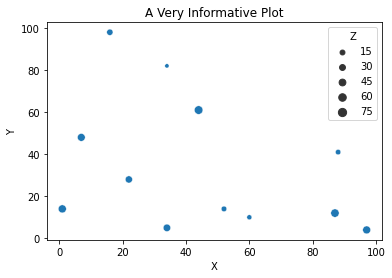

In [ ]:
sns.scatterplot(data=df, x="X", y="Y", size ="Z").set_title("A Very Informative Plot")
# plt.title("A Very Informative Plot")
plt.show()

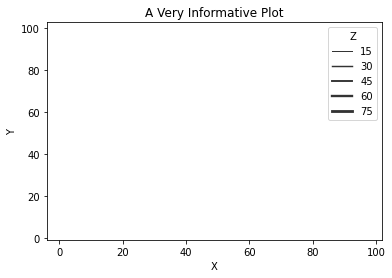

In [ ]:
# not showing here ?

sns.lineplot(x="X", y="Y", data=df, size ="Z")
plt.title("A Very Informative Plot")
plt.show()

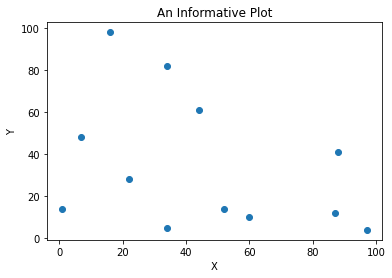

In [ ]:
# plt method
## can not show legends
plt.scatter(df.X, df.Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("An Informative Plot")
plt.show()

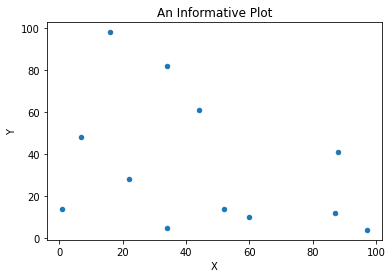

In [ ]:
df.plot("X", "Y", kind = "scatter") # no size
plt.title("An Informative Plot")
plt.show()

### sns.relpot()
--- relplot is FaceGrid, 只有x,y轴两边有直线

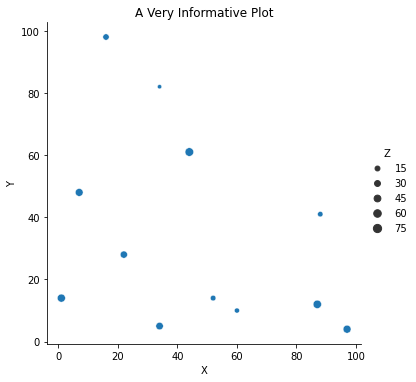

In [ ]:
# sns.set(style="darkgrid")

sns.relplot(data=df, x="X", y="Y", size ="Z")
plt.title("A Very Informative Plot")
plt.show()